In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to add a channel dimension (required by the CNN)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


11490434/11490434 [==============================] - 2s 0us/step


In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 7744)              0         
                                                      

In [14]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1491 - accuracy: 0.9552 - val_loss: 0.0457 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0548 - accuracy: 0.9830 - val_loss: 0.0363 - val_accuracy: 0.9882
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0399 - accuracy: 0.9870 - val_loss: 0.0324 - val_accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0316 - accuracy: 0.9899 - val_loss: 0.0287 - val_accuracy: 0.9905
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0292 - val_accuracy: 0.9913


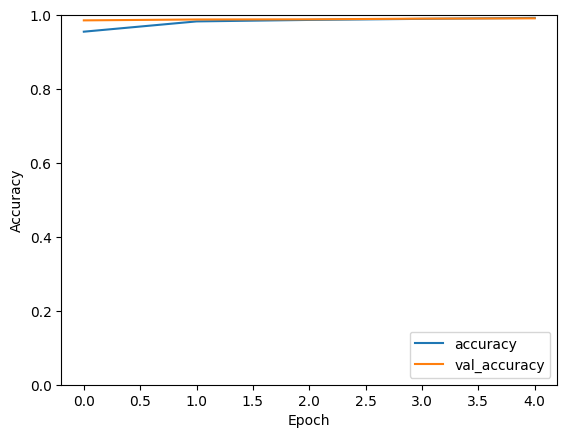

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step


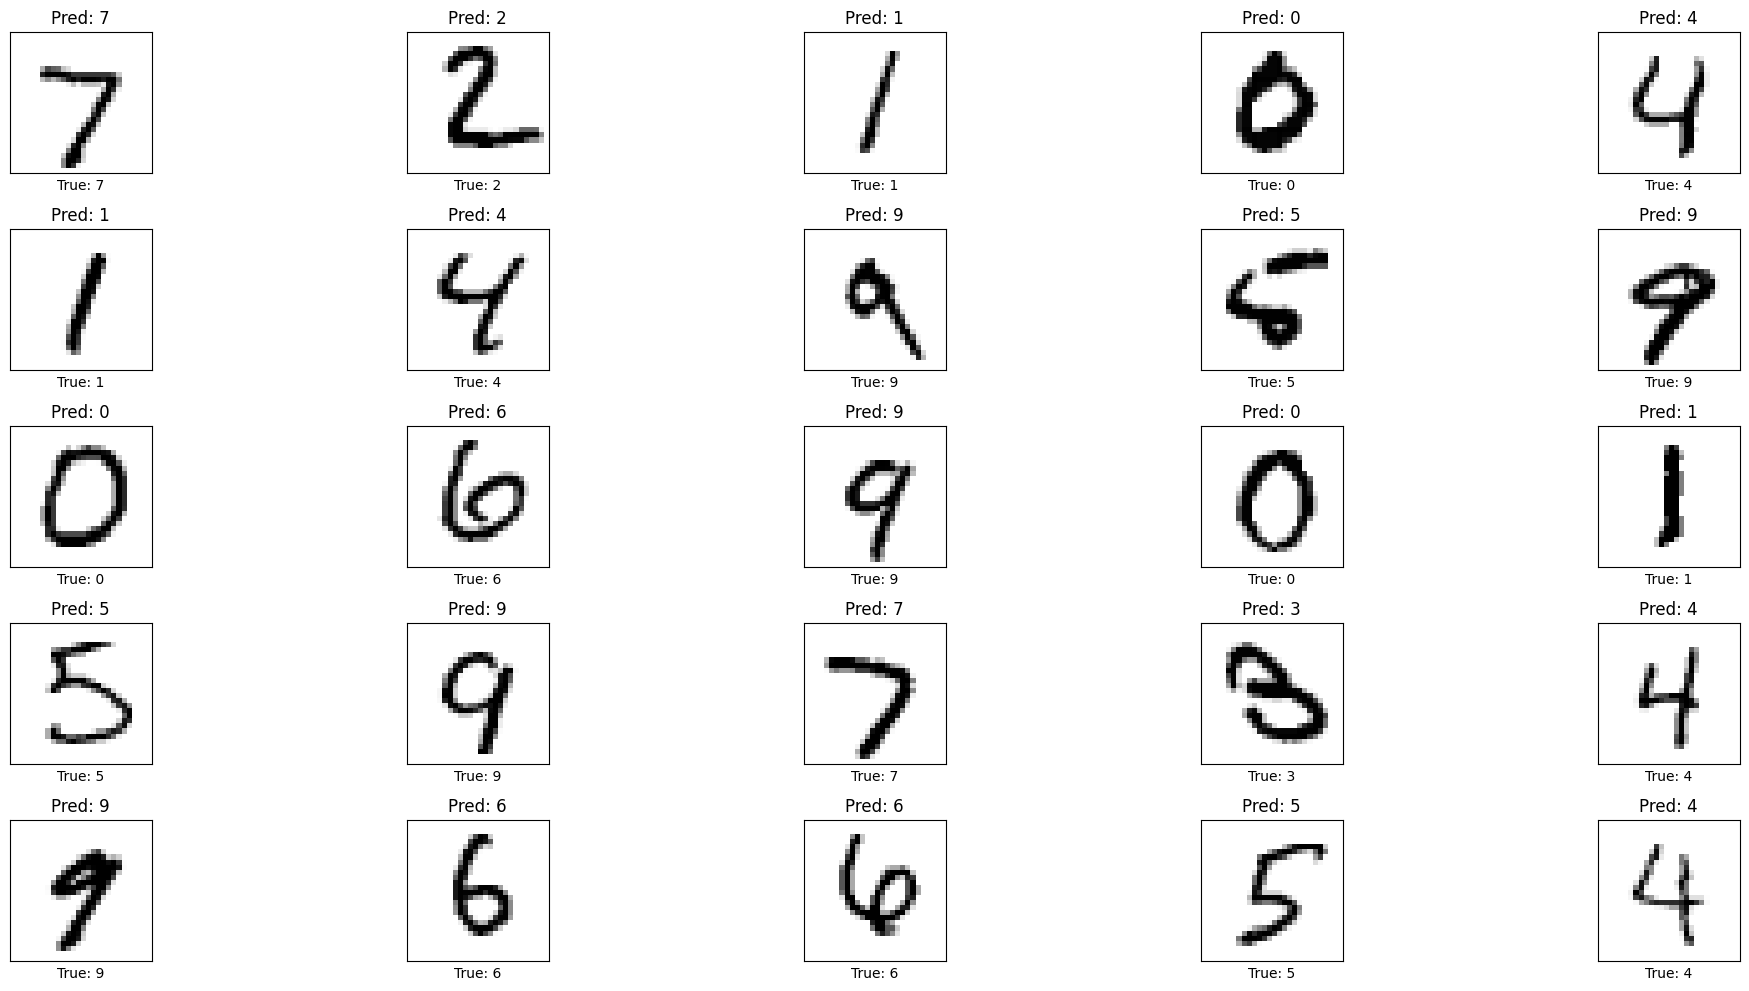

In [16]:
# Make predictions on test images
predictions = model.predict(test_images)

# Display a few test images along with their predicted and true labels
num_rows, num_cols = 5, 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {test_labels[i]}")
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()


313/313 [==============================] - 1s 3ms/step


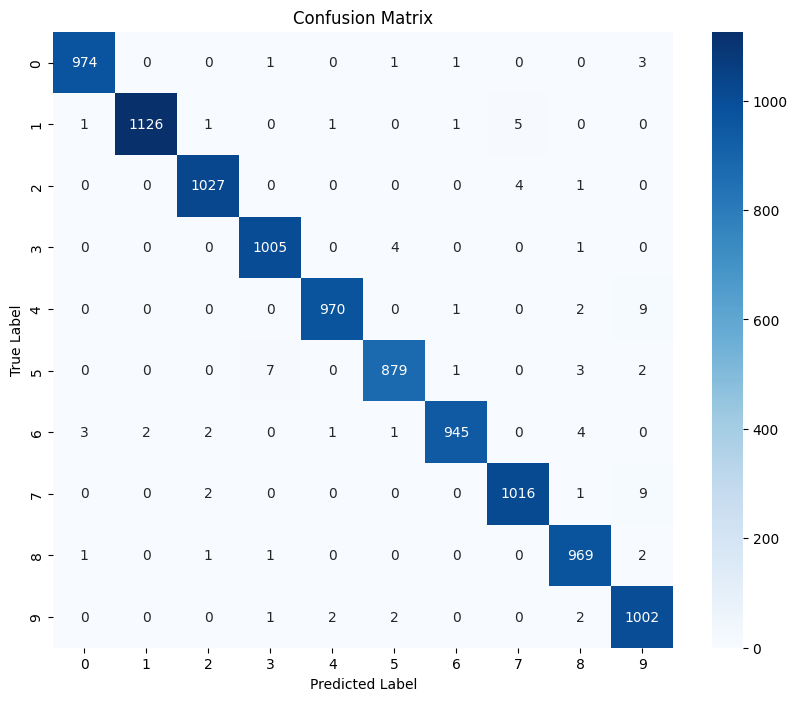

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Make predictions on test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
